In [2]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline

In [3]:
import e3tools.eda_table as et
import e3tools.ml_bench as mb
import e3tools.eda_display_utils as edu
import e3tools.eda_display_js_utils as edju
from importlib import reload

In [23]:
bos = pd.read_csv("https://raw.githubusercontent.com/jykim/dbook/master/boston.txt", delimiter="\t")

In [24]:
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# EDA

In [25]:
bos_e = et.EDATable(bos)

In [14]:
bos_e.colinfo()

,DataType,ValueCount,NullCount,0,1,2
crim,float64,504,0,0.00632,0.02731,0.02729
zn,float64,26,0,18.00000,0.00000,0.00000
indus,float64,76,0,2.31000,7.07000,7.07000
chas,float64,2,0,0.00000,0.00000,0.00000
nox,float64,81,0,0.53800,0.46900,0.46900
rm,float64,446,0,6.57500,6.42100,7.18500
age,float64,356,0,65.20000,78.90000,61.10000
dis,float64,412,0,4.09000,4.96710,4.96710
rad,float64,9,0,1.00000,2.00000,2.00000
tax,float64,66,0,296.00000,242.00000,242.00000


In [22]:
bos_e.desc(outputcol=3);

<Figure size 360x360 with 0 Axes>

# Regression

In [38]:
reload(mb)
mt = mb.MLTable(bos, "medv")

In [39]:
mt.normalize(topk=3).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
mt.encode()

Using normalized table...


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [41]:
mt.split()

Using encoded table...
Train Shape: (404, 14)
Test Shape: (102, 14)


In [77]:
mlb = mb.MLBench()

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

mlb.add_table(mt)
mlb.add_model(mb.MLModel("RT", DecisionTreeRegressor()))
mlb.add_model(mb.MLModel("LR", LinearRegression()))
mlb.add_model(mb.MLModel("GBR", GradientBoostingRegressor()))

In [78]:
mlb.train_batch()

In [79]:
mlb.evaluate_batch()

,tbl_name,raw_features,encoded_features,train_set,test_set,model_name,mean_squared_error,mean_absolute_error,explained_variance_score
0,Default,14,14,404,102,RT,19.258922,3.102941,0.715803
1,Default,14,14,404,102,LR,18.246571,3.263794,0.744725
2,Default,14,14,404,102,GBR,11.161683,2.030184,0.840875


In [80]:
pdp_cols = ['crim', 'zn', 'indus', 'chas', 
#             'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'
           ]

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.



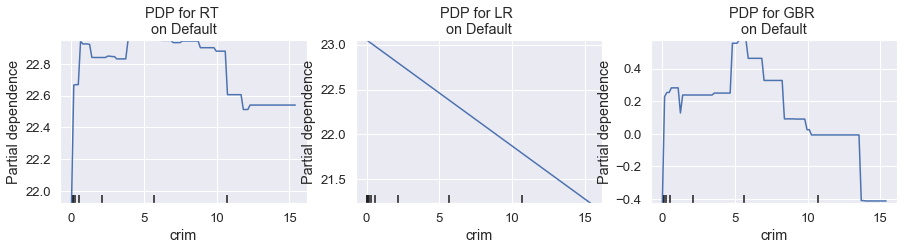

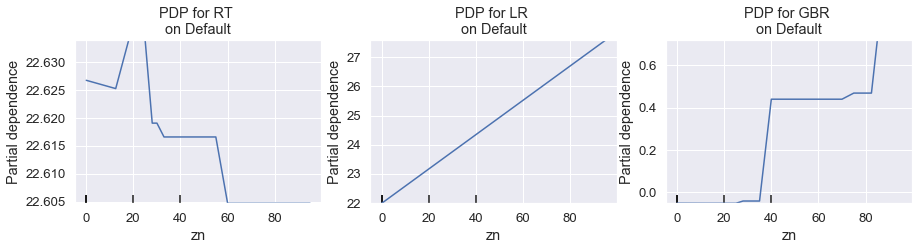

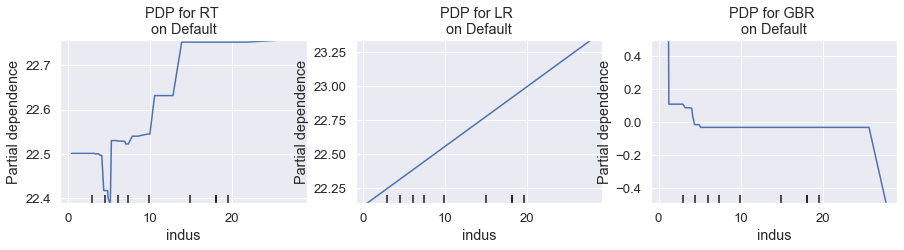

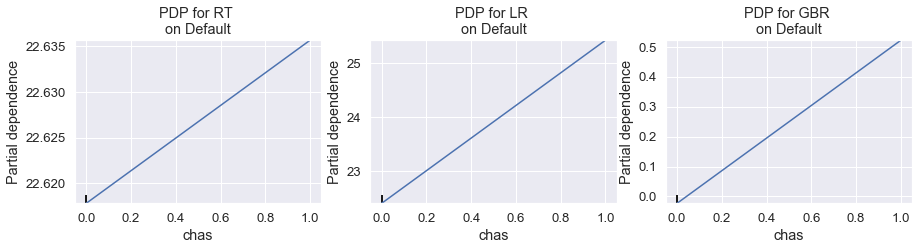

In [81]:
mlb.plot_partial_dependence(pdp_cols)

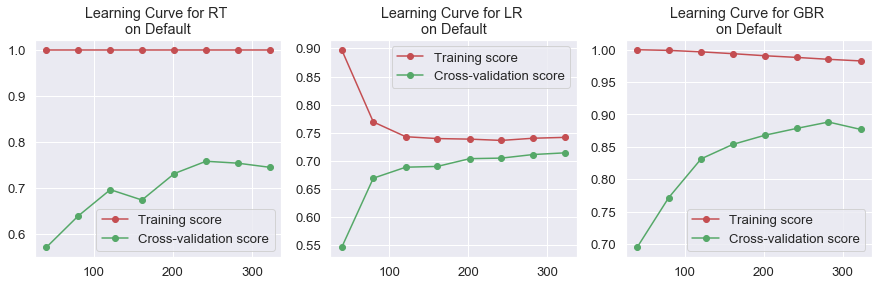

In [82]:
mlb.plot_learning_curve(scoring=mb.mean_squared_error)

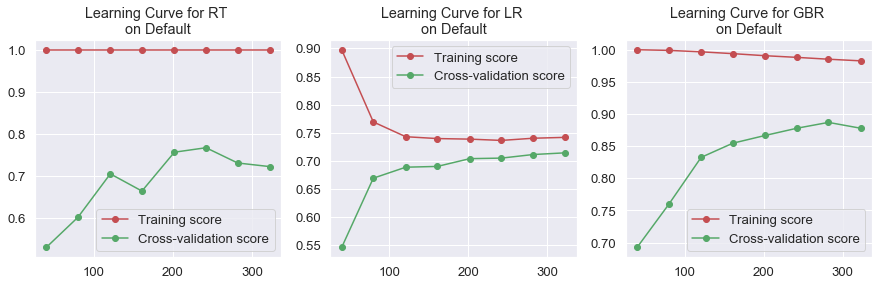

In [85]:
mlb.plot_learning_curve(scoring=mb.explained_variance_score)